# 16.01.2023 (11am - 1 pm)
- Categories of problems such as regression and classification,
- Linear relationship between attributes,
- statistical measures such as covariance and correlation,
- Simple linear regression: model output and it’s interpretation". 
- Understand special scenarios of non-linear data and
- appropriate transformation for the model to fit the linearity assumptions such as Tukey’s, Box-Cox and Box-Tidwell transformation,
- Model assumptions and diagnostics.
- Demonstrate the impact of influential points using an example dataset. Understand how Leverage and Cook’s Distance are used to identify influential data points and deal with them.

Ecommerce company based in a City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want. The company is trying to <b> Decide whether to focus their efforts on their mobile app experience or their website.<b>

About the Data
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:
    
    
- Avg. Session Length: Average session of in-store style advice sessions.
- Time on App: Average time spent on App in minutes
- Time on Website: Average time spent on Website in minutes
- Length of Membership: How many years the customer has been a member. 

**Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [1]:
#importing library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline
import warnings
from IPython.display import Image
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Ecommerce Customers_NOOutliers.csv")

In [3]:
df.shape # records and # columns

(500, 9)

In [4]:
#snapshot of dataset 
df.head()

Email  \
0                   kyang@diaz.org   
1                 asilva@yahoo.com   
2              william82@gmail.com   
3  jeffrey54@mcdonald-williams.com   
4               rhonda01@gmail.com   

                                            Address      Avatar  \
0  223 Love Trail Suite 831\nPort Jeffrey, IN 46849   OliveDrab   
1                        USNV Johnson\nFPO AP 19026       Wheat   
2        11143 Park Squares\nSamanthatown, UT 97073  SandyBrown   
3  297 Francis Valley\nSouth Lindsey, NY 13669-5367   Gainsboro   
4         939 Watson Run\nStaceyberg, VT 58376-0454      Orchid   

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.374258    15.126994        37.157624              5.377594   
1            34.603311    12.207298        33.913847              6.922689   
2            33.256335    13.858062        37.780265              5.976768   
3            34.967610    13.919494        37.952013              5.066697   
4            34.385820    12.729720        36.232110              5.705941   

   Yearly Amount Spent  Gender  
0           765.518462  Female  
1           744.221867    Male  
2           725.584814    Male  
3           712.396327  Female  
4           708.935185  Female

In [5]:
#last 5 rows of data
df.tail()

Email  \
495        fischermonica@gmail.com   
496       morganorozco@hotmail.com   
497              brian51@cook.info   
498       brandon77@richardson.com   
499  alexandra26@summers-davis.com   

                                               Address       Avatar  \
495  9847 Michael Plaza Suite 837\nLake Christopher...         Navy   
496      0001 Mack Mill\nNorth Jennifer, NE 42021-5936    LightPink   
497    0508 Terrance Cliff\nRebekahtown, NC 48724-8308  SaddleBrown   
498   109 Jessica Manor\nNorth Patriciashire, PR 84726   GhostWhite   
499              Unit 7032 Box 7016\nDPO AE 44749-2992         Navy   

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
495            32.529769    11.747732        36.939882              0.801516   
496            30.492537    11.562936        35.976565              1.481617   
497            31.517122    10.745189        38.791235              1.428824   
498            30.816201    11.851399        36.925043              1.084585   
499            32.836941    10.256549        36.143908              0.789520   

     Yearly Amount Spent Gender  
495           298.762008   Male  
496           282.471246   Male  
497           275.918421   Male  
498           266.086341   Male  
499           250.670580   Male

In [6]:
df.describe() # summary to understand the data, prints the summary only for numeric attributes by default

Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.302038  
std                0.999278            79.352011  
min                0.269901           250.670580  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.518462

In [7]:
df.info() # To understand the data type for each of the variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
 8   Gender                500 non-null    object 
dtypes: float64(5), object(4)
memory usage: 35.3+ KB


In [8]:
df.describe(include=['O']).T

count unique                                               top freq
Email     500    500                                    kyang@diaz.org    1
Address   500    500  223 Love Trail Suite 831\nPort Jeffrey, IN 46849    1
Avatar    500    138                                              Teal    7
Gender    500      2                                              Male  260

In [9]:
df.nunique()

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
Gender                    2
dtype: int64

In [10]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
Gender                  0
dtype: int64

# Exploratory Data Analysis

Let's explore the data!

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use Plotly to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [11]:
# !pip install plotly    #for installtion any package u need to type pip install
import plotly.express as px #importing plotly

In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'Gender'],
      dtype='object')

In [13]:
px.scatter(data_frame=df,x="Avg. Session Length",y="Yearly Amount Spent")


In [14]:
px.scatter(data_frame=df,x="Time on App",y="Yearly Amount Spent")

In [15]:
px.scatter(data_frame=df,x="Time on Website",y="Yearly Amount Spent")

In [16]:
px.scatter(data_frame=df,x="Length of Membership",y="Yearly Amount Spent")

In [17]:
df_clean = df.drop(columns = ['Email','Address','Avatar'],axis=1)
#dropping unneccessary variables such as unique values

In [18]:
df_clean.drop(['Gender'],axis=1)  # drop will affect here only you can use inplace parameter

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0              34.374258    15.126994        37.157624              5.377594   
1              34.603311    12.207298        33.913847              6.922689   
2              33.256335    13.858062        37.780265              5.976768   
3              34.967610    13.919494        37.952013              5.066697   
4              34.385820    12.729720        36.232110              5.705941   
..                   ...          ...              ...                   ...   
495            32.529769    11.747732        36.939882              0.801516   
496            30.492537    11.562936        35.976565              1.481617   
497            31.517122    10.745189        38.791235              1.428824   
498            30.816201    11.851399        36.925043              1.084585   
499            32.836941    10.256549        36.143908              0.789520   

     Yearly Amount Spent  
0             765.518462  
1             744.221867  
2             725.584814  
3             712.396327  
4             708.935185  
..                   ...  
495           298.762008  
496           282.471246  
497           275.918421  
498           266.086341  
499           250.670580  

[500 rows x 5 columns]

In [19]:
df_clean=df_clean.drop(['Gender'],axis=1)

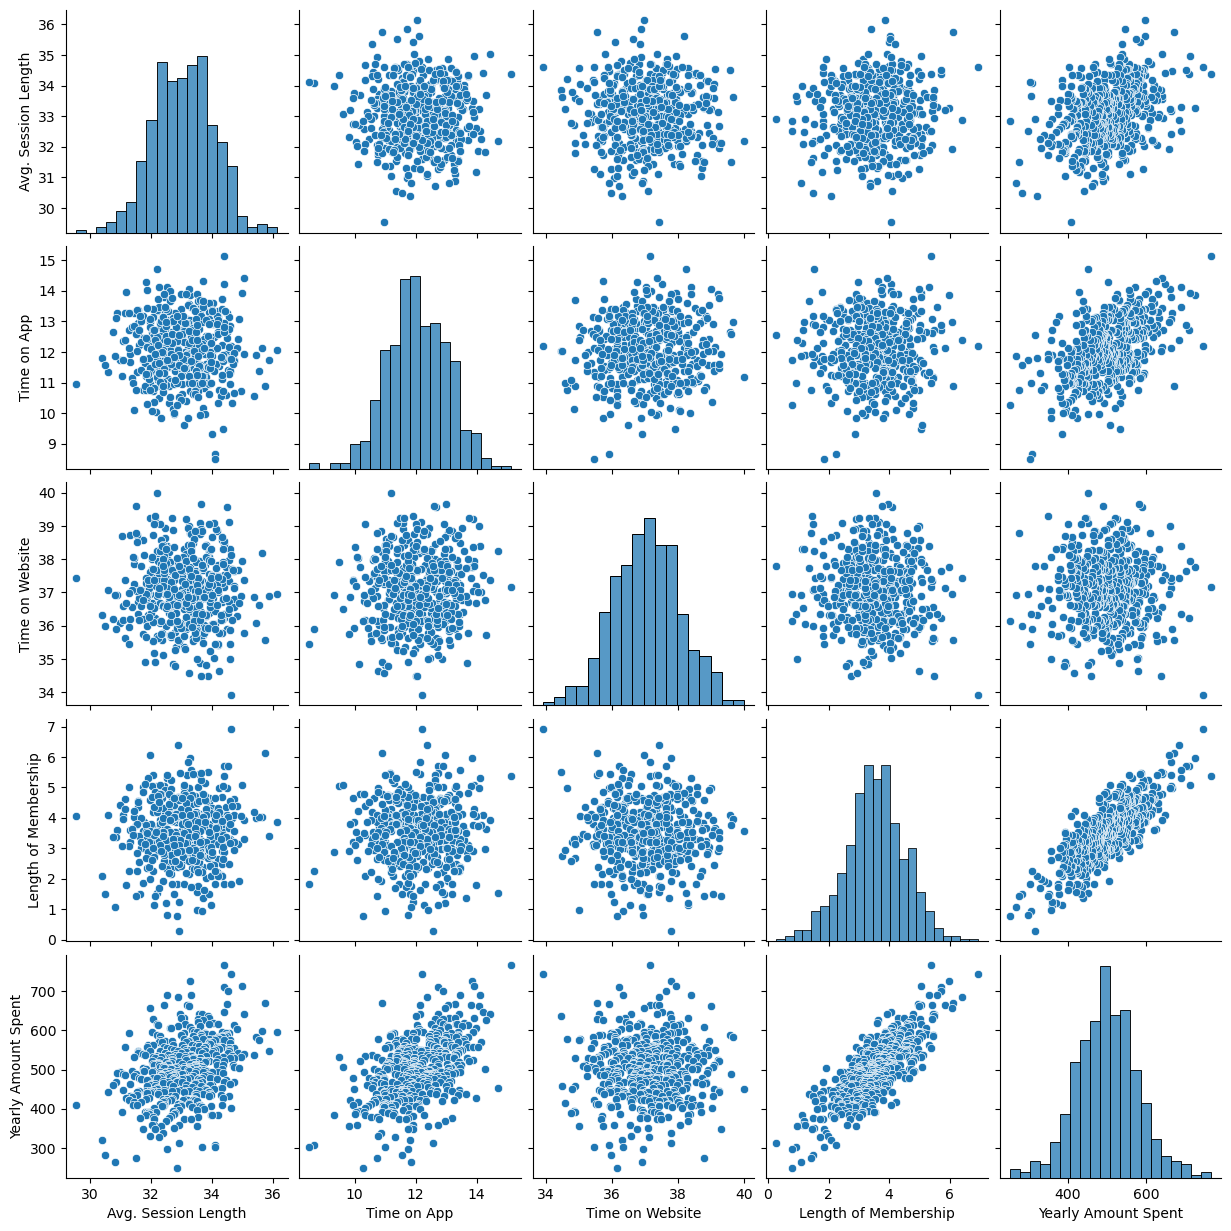

In [20]:
sns.pairplot(df_clean)  # use this for less than 10 features

In [21]:
df_clean.corr() # correleation on numbers

Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   
Yearly Amount Spent              0.354955     0.499367        -0.002502   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.354955  
Time on App                       0.029143             0.499367  
Time on Website                  -0.047582            -0.002502  
Length of Membership              1.000000             0.809120  
Yearly Amount Spent               0.809120             1.000000

<AxesSubplot:>

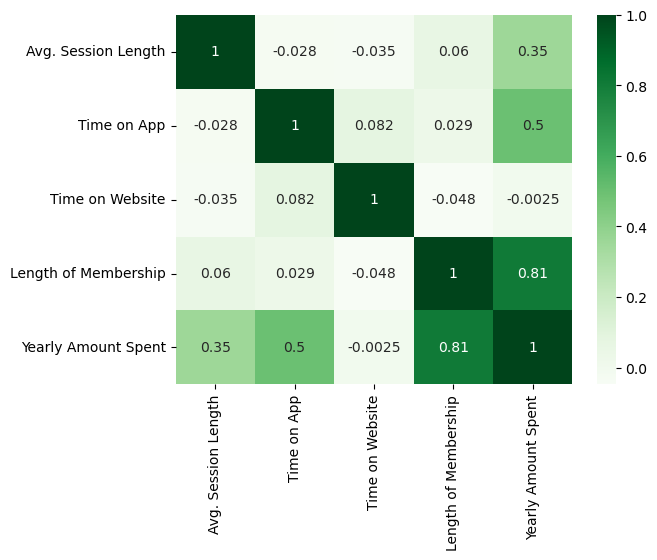

In [22]:
sns.heatmap(data=df_clean.corr(),annot=True,cmap="Greens")

#  Visual representation for simple linear regression


In [23]:
lin=px.scatter(data_frame=df,x="Length of Membership",y="Yearly Amount Spent",trendline="ols")
lin.show()

# In this graph the line represent
## yearly amount=64 * length of membership +272.2  this is the line we got

# ## Data Preparation for model building 

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [24]:
df_clean.head() #snapshot of clean data

Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.374258    15.126994        37.157624              5.377594   
1            34.603311    12.207298        33.913847              6.922689   
2            33.256335    13.858062        37.780265              5.976768   
3            34.967610    13.919494        37.952013              5.066697   
4            34.385820    12.729720        36.232110              5.705941   

   Yearly Amount Spent  
0           765.518462  
1           744.221867  
2           725.584814  
3           712.396327  
4           708.935185

In [25]:
df_clean.info() #info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [26]:
#separate dependent and independt feature
x=np.array(df_clean['Length of Membership']).reshape(-1, 1)
y=np.array(df_clean['Yearly Amount Spent']).reshape(-1, 1)

In [27]:
x[:5]

array([[5.37759358],
       [6.92268934],
       [5.97676813],
       [5.06669686],
       [5.70594072]])

In [28]:
y[:5]

array([[765.5184619],
       [744.2218671],
       [725.5848141],
       [712.3963268],
       [708.9351849]])

# Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

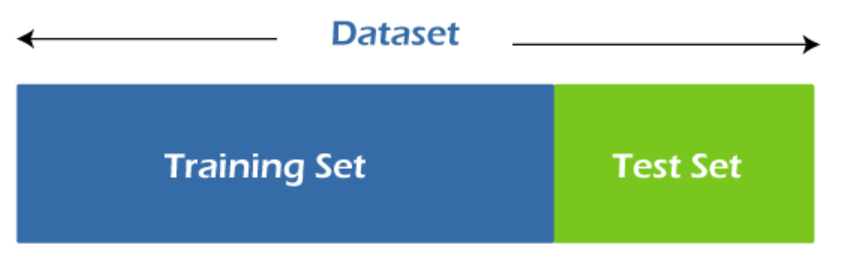

In [29]:
### Spilit the data into Training and Testing Data
Image('train_test.png')

In [30]:
# loading the libraries to split the data into Train and Test 
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101) #train test splitt

In [32]:
print('Y Target Size:',len(y_train))
print('X Train Size:', len(X_train))
print('X Test  Size:', len(X_test))
print('Y Target Size:', len(y_test))

Y Target Size: 400
X Train Size: 400
X Test  Size: 100
Y Target Size: 100


In [33]:
### without Random_state
sample = np.arange(1,11)
print(sample)

[ 1  2  3  4  5  6  7  8  9 10]


In [34]:
train_sample,test_sample = train_test_split(sample,test_size=0.2)
print('Train Sample data : ',train_sample)
print('Test Sample data : ',test_sample)

Train Sample data :  [ 5  2  3  6  4 10  7  1]
Test Sample data :  [9 8]


In [35]:
#with random sample
train_sample,test_sample = train_test_split(sample,test_size=0.2,random_state=3452)

In [36]:
print('Train Sample data : ',train_sample)
print('Test Sample data : ',test_sample)

Train Sample data :  [ 4 10  3  7  1  8  5  2]
Test Sample data :  [6 9]


# Creating simple linear regression model using Sklearn in python

In [37]:
 from sklearn.linear_model import LinearRegression

In [38]:
lr=LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
# prediction of x_test
y_pred=lr.predict(X_test)
print(y_pred[:5])

[[623.02361055]
 [478.56993159]
 [459.79021866]
 [639.18500566]
 [514.92184267]]


In [41]:
y_test[:5]

array([[640.7861664],
       [451.7278633],
       [558.4272572],
       [708.9351849],
       [536.4231045]])

In [42]:
df = pd.DataFrame(y_test, columns=['Actual'])
df['Predicted']=y_pred
df.head()

Actual   Predicted
0  640.786166  623.023611
1  451.727863  478.569932
2  558.427257  459.790219
3  708.935185  639.185006
4  536.423105  514.921843

In [43]:
print(lr.coef_)

[[64.13983984]]


In [44]:
print(lr.intercept_)

[273.20688195]


In [45]:
X_test[:2]

array([[5.45396948],
       [3.20180172]])

In [46]:
yhat=273.20+64*5.45396948  #y = mx+c    b0+b1x

In [47]:
yhat

622.2540467199999

In [48]:
from sklearn.metrics import r2_score

In [49]:
Rsquare=r2_score(y_test,y_pred)

In [50]:
Rsquare

0.6641025097792512

In [51]:
from scipy import stats # to scale the residuals

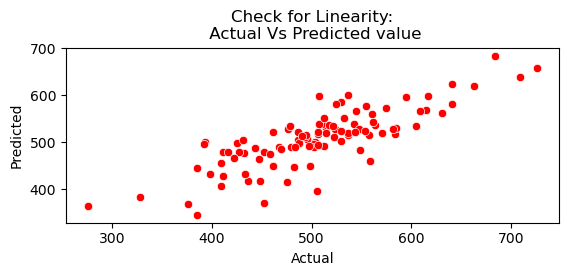

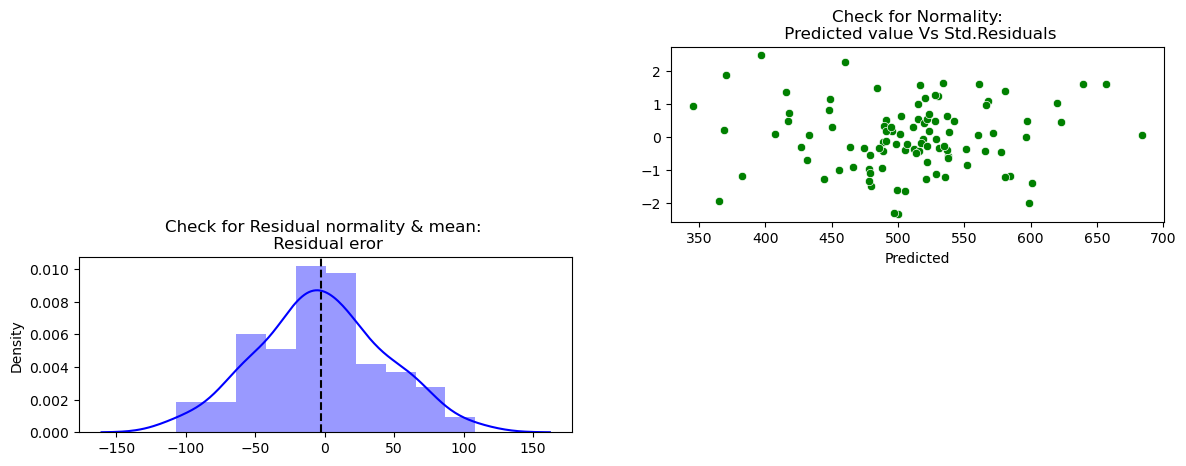

In [65]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(221)
sns.scatterplot(df['Actual'],df['Predicted'],ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

std_residuals = stats.zscore(df['Actual']-df['Predicted'])
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(222)
sns.scatterplot(df['Predicted'],std_residuals,ax=ax,color='g')
ax.set_title('Check for Normality:\n Predicted value Vs Std.Residuals')


# Check for Residual normality & mean
ax = f.add_subplot(223)
sns.distplot((df['Actual'] - df['Predicted']),ax=ax,color='b')
ax.axvline((df['Actual'] - df['Predicted']).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');


# Residuals - QQ Plot

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

In [53]:
import statsmodels.api as sm # taking the models that are already developed in R and calling them via API 

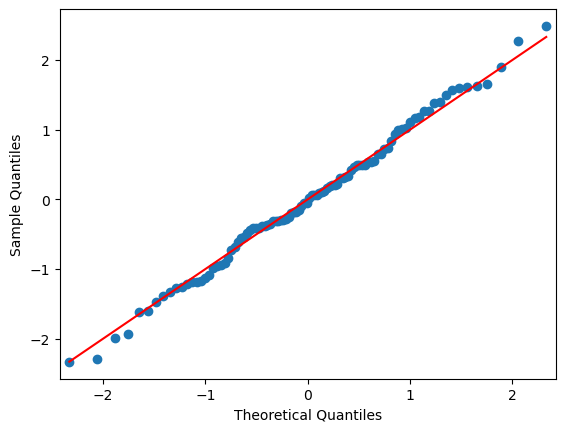

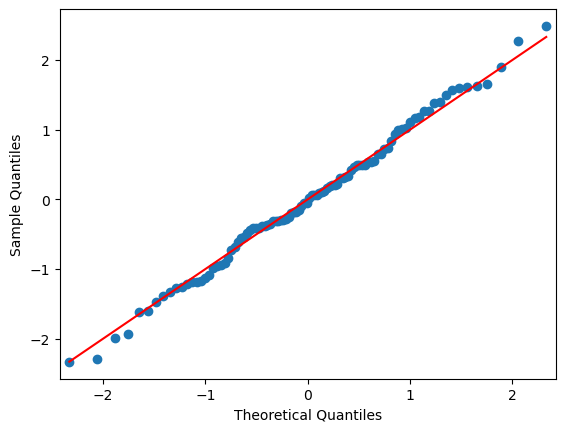

In [54]:
sm.qqplot(std_residuals,line='s')

# Simple regression in Using R api style 

In [55]:
#separate dependent and independt feature
x=df_clean['Length of Membership']
y=df_clean['Yearly Amount Spent']

In [56]:
x.head()

0    5.377594
1    6.922689
2    5.976768
3    5.066697
4    5.705941
Name: Length of Membership, dtype: float64

In [57]:
y.head()

0    765.518462
1    744.221867
2    725.584814
3    712.396327
4    708.935185
Name: Yearly Amount Spent, dtype: float64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2345) 
# random_sate is to fix the randomness


In [59]:
X_train.head()

195    2.995761
385    2.952669
230    3.345571
178    3.576526
283    4.104543
Name: Length of Membership, dtype: float64

In [60]:
# adding the Constant term
X_reg = sm.add_constant(X_train)
X_reg.head()

const  Length of Membership
195    1.0              2.995761
385    1.0              2.952669
230    1.0              3.345571
178    1.0              3.576526
283    1.0              4.104543

In [61]:
y_train[:5]

195    520.898795
385    442.667252
230    505.771140
178    529.049004
283    487.547505
Name: Yearly Amount Spent, dtype: float64

In [62]:
model = sm.OLS(endog = y_train,exog=X_reg[['const','Length of Membership']])
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.643
Model:                             OLS   Adj. R-squared:                  0.642
Method:                  Least Squares   F-statistic:                     718.0
Date:                 Mon, 16 Jan 2023   Prob (F-statistic):           3.89e-91
Time:                         10:55:09   Log-Likelihood:                -2105.5
No. Observations:                  400   AIC:                             4215.
Df Residuals:                      398   BIC:                             4223.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 

In [63]:
275.7921 + 62.9144*2.952669

461.5574985336

In [64]:
results.fittedvalues

195    464.268557
385    461.557436
230    486.276626
178    500.807015
283    534.026899
          ...    
236    499.629747
400    437.270651
352    487.298585
263    513.723157
80     514.408227
Length: 400, dtype: float64